In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor
from src.dbc import utils, TimeDivisionKMeans

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [9]:
m_15 = utils.data_preprocessing(xlsx)

df = utils.dimension_reduction(m_15)
m_60 = df.copy()

m_60.head()

m_60_1 = m_60[m_60.index.month == 1].copy()
m_60_1.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0.000,0.034,0.037,0.062,0.322,0.240,0.295,0.373,0.243,...,0.534,0.188,0.400,0.318,0.420,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0.000,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.250,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0.000,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0.000,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.190,0.227,...,0.275,0.245,0.310,0.423,0.360,0.364,0.212,0.347,0.294,0.507


In [178]:
from src import KMeans

kmeans = KMeans(datas=m_60_1.T.values)

ECV : 47 %


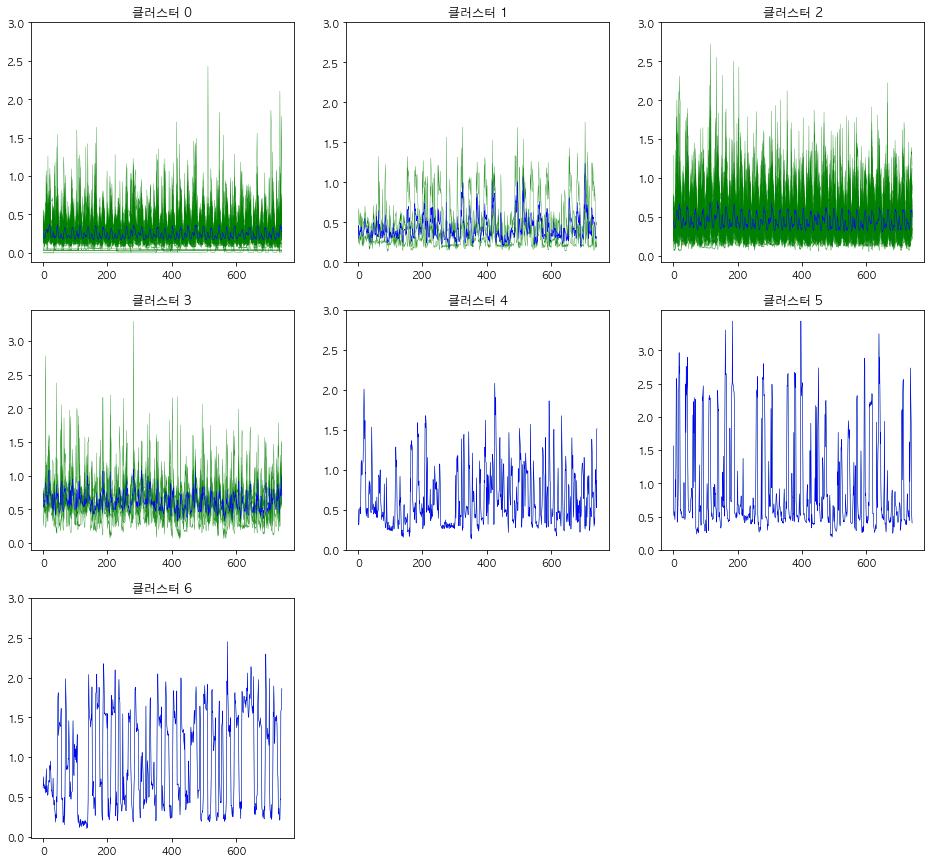

In [186]:
kmeans.fit()
kmeans.sorting()
kmeans.draw_plot()

In [187]:
month_df = pd.DataFrame(
    np.column_stack([m_60_1.columns.values, m_60_1.sum(axis=0).round().astype("int")]),
    columns=['가구명', 'usage (kWh)']
)
group_df = month_df.copy()
group_df['label'] = kmeans.labels_.astype("int")

group_df.head()

,가구명,usage (kWh),label
0,아파트1-104-1206,99,0
1,아파트1-104-303,10,0
2,아파트1-104-1307,23,0
3,아파트1-104-1208,40,0
4,아파트1-104-408,39,0


In [188]:
cluster_df = pd.DataFrame(kmeans.clusters_.T, index=m_60_1.index)

cluster_df.loc['토탈'] = cluster_df.sum().round()
cluster_df.tail()

,0,1,2,3,4,5,6
2019-01-31 20:00:00,0.305714,0.324667,0.582630,0.721167,0.876,1.940,1.582
2019-01-31 21:00:00,0.340119,0.320333,0.562870,0.804667,0.527,0.564,1.594
2019-01-31 22:00:00,0.333476,0.297667,0.588352,0.996000,1.480,0.531,1.719
2019-01-31 23:00:00,0.272452,0.304000,0.536593,0.705833,1.517,0.405,1.861
토탈,178.000000,319.000000,334.000000,460.000000,473.000,689.000,711.000


# 이상치 패턴

In [189]:
min_anomaly_data = pd.DataFrame()

for label in range(kmeans.K - 1):
    now_step_df = group_df[group_df['label'] == label]
    next_step_min = group_df[group_df['label'] == (label + 1)]['usage (kWh)'].min()
    chk_idx = now_step_df['usage (kWh)'] > next_step_min\
    
    chk = now_step_df[chk_idx]
    
    if len(chk) != 0:
        min_anomaly_data = min_anomaly_data.append(
            chk
        )
    
min_anomaly_data

,가구명,usage (kWh),label
36,아파트1-101-504,322,1
50,아파트1-103-1006,284,1
59,아파트1-103-106,351,1
20,아파트1-102-403,424,2
52,아파트1-103-1803,420,2
89,아파트1-101-503,422,2
62,아파트1-103-703,498,3
80,아파트1-103-1002,494,3


In [190]:
max_anomaly_data = pd.DataFrame()

for label in range(1,kmeans.K):
    now_step_df = group_df[group_df['label'] == label]
    next_step_min = group_df[group_df['label'] == (label - 1)]['usage (kWh)'].max()
    chk_idx = now_step_df['usage (kWh)'] < next_step_min\
    
    chk = now_step_df[chk_idx]
    
    if len(chk) != 0:
        max_anomaly_data = max_anomaly_data.append(
            chk
        )
    
max_anomaly_data

,가구명,usage (kWh),label
14,아파트1-103-202,319,2
16,아파트1-102-603,251,2
17,아파트1-102-203,326,2
18,아파트1-102-704,255,2
19,아파트1-102-703,257,2
23,아파트1-101-1602,350,2
27,아파트1-101-402,345,2
31,아파트1-101-904,267,2
34,아파트1-101-901,297,2
37,아파트1-102-104,309,2


In [295]:
group_df[group_df['label'] == 1]

,가구명,usage (kWh),label
36,아파트1-101-504,322,1
50,아파트1-103-1006,284,1
59,아파트1-103-106,351,1


In [297]:
group_df[group_df['label'] == 1]['usage (kWh)'].mean()

319.0

In [299]:
group_df[group_df['label'] == 2]['usage (kWh)']

11     387
13     397
14     319
16     251
17     326
18     255
19     257
20     424
23     350
27     345
28     376
30     380
31     267
34     297
37     309
39     262
40     285
43     406
44     280
45     291
46     386
48     331
51     405
52     420
54     341
58     298
60     381
61     263
63     371
64     369
65     371
72     290
77     308
82     264
83     280
85     324
87     316
88     351
89     422
90     386
91     310
92     389
93     343
95     266
96     387
97     387
99     329
100    327
101    300
102    415
103    273
104    255
106    384
107    317
Name: usage (kWh), dtype: object

In [191]:
import matplotlib
import matplotlib.pyplot as plt

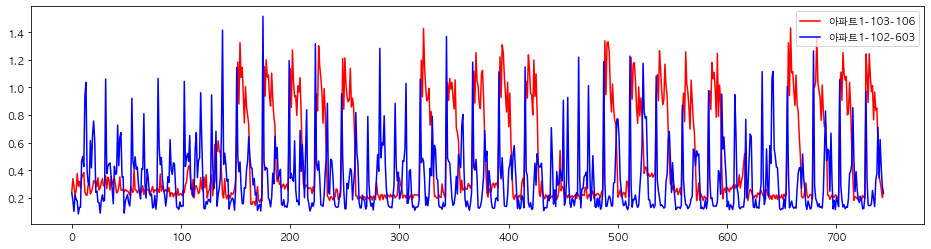

In [205]:
plt.figure(figsize=(16, 4))

plt.plot(m_60_1[min_anomaly_data['가구명'].values[2]].values, c='r',label=min_anomaly_data['가구명'].values[2])
plt.plot(m_60_1[max_anomaly_data['가구명'].values[1]].values, c='b', label=max_anomaly_data['가구명'].values[1])

plt.legend(loc='upper right')

plt.show()

In [221]:
label_1_cluster = cluster_df[1].values[:-1]
label_2_cluster = cluster_df[2].values[:-1]

min_check = m_60_1[min_anomaly_data['가구명'].values[2]].values
max_check = m_60_1[max_anomaly_data['가구명'].values[1]].values

check_point = [
    [label_1_cluster, min_check, min_anomaly_data['가구명'].values[2]],
    [label_2_cluster, max_check, max_anomaly_data['가구명'].values[1]],
]

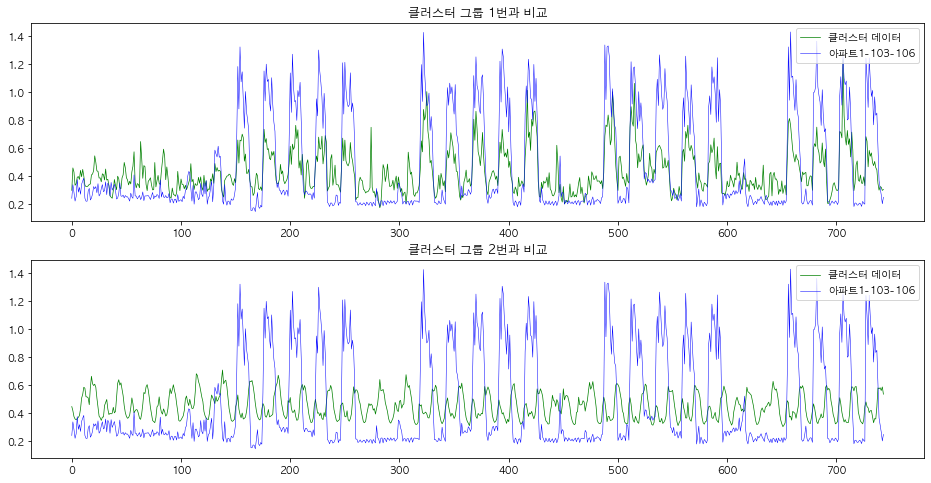

In [303]:
plt.figure(figsize=(16,8))

for idx,chk in enumerate(check_point):
    ax = plt.subplot(2, 1, idx+1)
    ax.plot(chk[0], color='g', linewidth=0.7, label='클러스터 데이터')
    ax.plot(min_check, color='b', linewidth=0.5, label=check_point[0][2])
    ax.set_title("클러스터 그룹 {}번과 비교".format(idx + 1))
    ax.legend(loc='upper right')

plt.show()

# Eucliean Distance Trouble

In [314]:
from sklearn.metrics.pairwise import euclidean_distances as euc

In [315]:
chk_1.sum()

350.85

In [327]:
pat_1 = check_point[0][0]
pat_2 = check_point[1][0]

chk_1 = check_point[0][1]
chk_name = check_point[0][2]

euc(
    chk_1.reshape(1,-1),
    pat_2.reshape(1,-1)
)

array([[10.19484822]])

In [322]:
min_mem = []
err_mem = []

for idx,p_1 in enumerate(pat_1):
    c_1 = chk_1[idx]
    min_mem.append(
        min(c_1, p_1)
    )
    err_mem.append(
        abs(c_1 - p_1)
    )

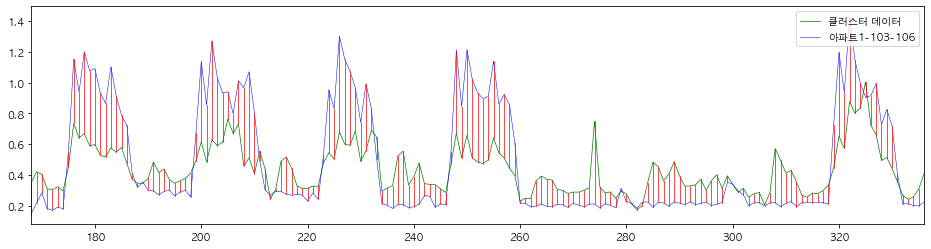

In [323]:
plt.figure(figsize=(16,4))

plt.plot(pat_1, color='g', linewidth=0.7, label="클러스터 데이터")
plt.plot(chk_1, color='b', linewidth=0.5, label=chk_name)

for idx, _min in enumerate(min_mem):
    _err = err_mem[idx]
    plt.plot([idx, idx],[_min, _min+_err], c='r', linewidth=0.7)

plt.xlim([168 * 1, 168 * 2])
plt.legend(loc='upper right')

plt.show()

In [324]:
min_mem = []
err_mem = []

for idx,p_2 in enumerate(pat_2):
    c_1 = chk_1[idx]
    min_mem.append(
        min(c_1, p_2)
    )
    err_mem.append(
        abs(c_1 - p_2)
    )

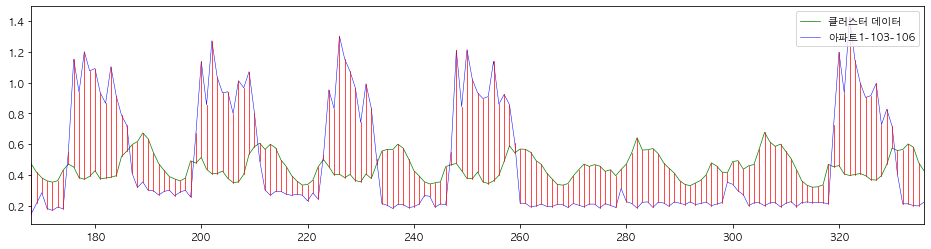

In [325]:
plt.figure(figsize=(16,4))

plt.plot(pat_2, color='g', linewidth=0.7, label="클러스터 데이터")
plt.plot(chk_1, color='b', linewidth=0.5, label=chk_name)

for idx, _min in enumerate(min_mem):
    _err = err_mem[idx]
    plt.plot([idx, idx],[_min, _min+_err], c='r', linewidth=0.7)

plt.xlim([168 * 1, 168 * 2])
plt.legend(loc='upper right')

plt.show()

In [345]:
inc_mem_pat_1 = np.array([pat_1[0]])

for p_1 in pat_1[1:]:
    inc_mem_pat_1 = np.append(inc_mem_pat_1, 
                             inc_mem_pat_1[-1] + p_1)

In [346]:
inc_mem_pat_2 = np.array([pat_2[0]])

for p_1 in pat_2[1:]:
    inc_mem_pat_2 = np.append(inc_mem_pat_2, 
                             inc_mem_pat_2[-1] + p_1)

In [347]:
inc_mem_chk_1 = np.array([chk_1[0]])

for p_1 in chk_1[1:]:
    inc_mem_chk_1 = np.append(inc_mem_chk_1, 
                             inc_mem_chk_1[-1] + p_1)

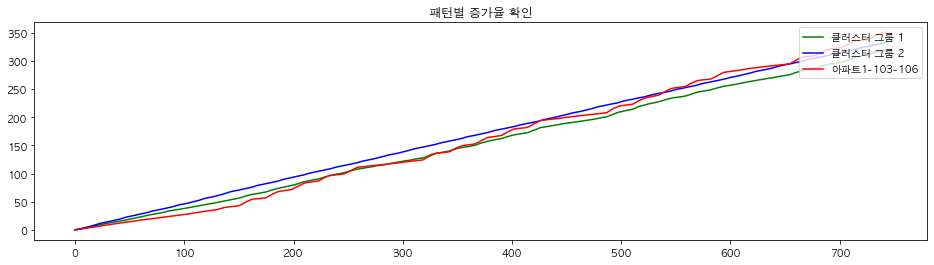

In [352]:
plt.figure(figsize=(16,4))

plt.plot(inc_mem_pat_1, color='g', label="클러스터 그룹 1")
plt.plot(inc_mem_pat_2, color='b', label="클러스터 그룹 2")
plt.plot(inc_mem_chk_1, color='r', label=chk_name)

plt.title("패턴별 증가율 확인")
plt.legend(loc="upper right")

plt.show()